## **Marvel Movies Data Analytics: Insights & Trends**

Analyzing budget, revenue, and profitability trends in the Marvel Cinematic Universe.  
Exploring audience ratings, revenue growth, and top-performing films with data visualization.

# Phase 1 : Data Acquisition

1.1 Upload and Load Dataset

In [ ]:
file_path = "/content/Marvel_Movies_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,02/05/08 0:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,13/06/08 0:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,07/05/10 0:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,06/05/11 0:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,22/07/11 0:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6


# Phase 2 : Data Preprocessing


**2.1 Check Data Types & Missing Values**

In [ ]:
print(df.info())  # Check data types
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Index                                            34 non-null     int64  
 1   Title                                            34 non-null     object 
 2   Director (1)                                     34 non-null     object 
 3   Director (2)                                     5 non-null      object 
 4   Release Date (DD-MM-YYYY)                        34 non-null     object 
 5   IMDb (scored out of 10)                          34 non-null     float64
 6   IMDB Metascore (scored out of 100)               34 non-null     int64  
 7   Rotten Tomatoes - Critics (scored out of 100%)   34 non-null     int64  
 8   Rotten Tomatoes - Audience (scored out of 100%)  34 non-null     int64  
 9   Letterboxd (scored out of 5)      

**2.2 Rename Columns for Easy Access**

In [ ]:
df.rename(columns={
    'Index': 'Index',
    'Title': 'Title',
    'Director (1)': 'Director_1',
    'Director (2)': 'Director_2',
    'Release Date (DD-MM-YYYY)': 'Release_Date',
    'IMDb (scored out of 10)': 'IMDb',
    'IMDB Metascore (scored out of 100)': 'IMDB_Metascore',
    'Rotten Tomatoes - Critics (scored out of 100%)': 'Rotten_Tomatoes_Critics',
    'Rotten Tomatoes - Audience (scored out of 100%)': 'Rotten_Tomatoes_Audience',
    'Letterboxd (scored out of 5)': 'Letterboxd',
    'CinemaScore (grades A+ to F)': 'CinemaScore',
    'Budget (in million $)': 'Budget',
    'Domestic Gross (in million $)': 'Domestic_Gross',
    'Worldwide Gross (in million $)': 'Worldwide_Gross'
}, inplace=True)

# Print the new column names
print(df.columns)


Index(['Index', 'Title', 'Director_1', 'Director_2', 'Release_Date', 'IMDb',
       'IMDB_Metascore', 'Rotten_Tomatoes_Critics', 'Rotten_Tomatoes_Audience',
       'Letterboxd', 'CinemaScore', 'Budget', 'Domestic_Gross',
       'Worldwide_Gross'],
      dtype='object')


**2.3 Convert Numeric Columns**
*   Convert Budget and Worldwide Gross to numeric values in dollars.
*   Convert Release Date to the proper datetime format.




In [ ]:
import pandas as pd

df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['Worldwide_Gross'] = pd.to_numeric(df['Worldwide_Gross'], errors='coerce')

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], dayfirst=True, errors='coerce')


<ipython-input-38-cc4899a68fc2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'], dayfirst=True, errors='coerce')


**2.4 Calculate Profit and Profit Margin**

In [ ]:
df['Profit'] = df['Worldwide_Gross'] - df['Budget']
df['Profit_Margin'] = (df['Profit'] / df['Budget']) * 100

# Print the Profits and Profit Margins
print(df[['Profit', 'Profit_Margin']])


    Profit  Profit_Margin
0    445.8     318.428571
1    115.5      77.000000
2    423.9     211.950000
3    299.3     199.533333
4    155.6      72.372093
5   1296.0     576.000000
6   1015.0     507.500000
7    372.8     137.058824
8    537.4     303.615819
9    577.4     294.591837
10  1040.0     284.931507
11   350.3     207.278107
12   905.0     362.000000
13   441.8     187.203390
14   669.0     334.500000
15   705.9     403.371429
16   685.0     380.555556
17  1150.0     575.000000
18  1652.0     413.000000
19   427.7     219.333333
20   956.0     546.285714
21  2399.0     599.750000
22   973.0     608.125000
23    91.8      31.875000
24   232.2     116.100000
25   166.1      70.381356
26  1752.0     876.000000
27   605.8     173.085714
28   510.9     204.360000
29   609.2     243.680000
30   146.1      44.272727
31   595.6     238.240000
32   -13.7      -6.232939
33  1138.0     569.000000


# Phase 3 : Exploratory Data Analysis & Visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**3.1 Budget vs. Worldwide Gross**

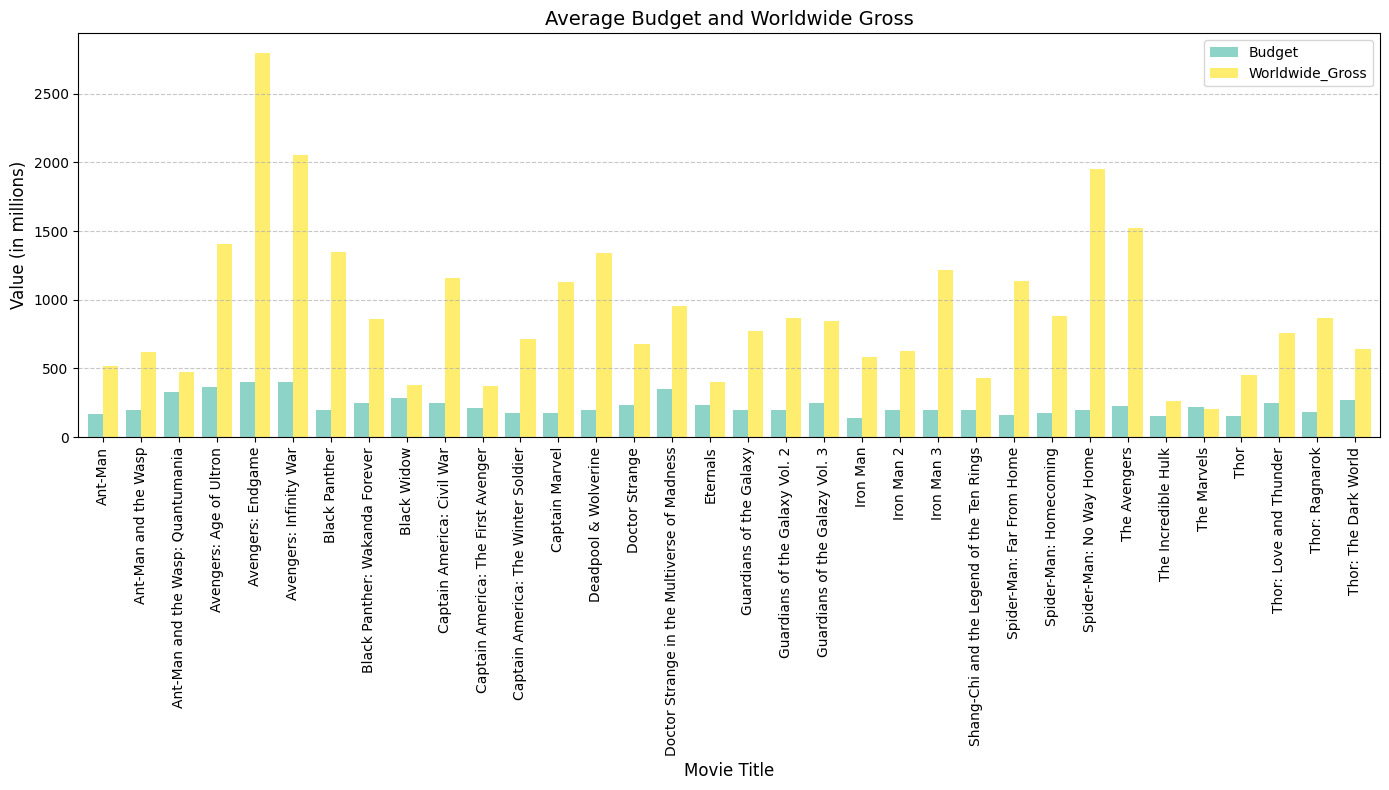

In [ ]:
# Create the grouped bar plot
ax = df.groupby('Title')[['Budget', 'Worldwide_Gross']].mean().plot(kind='bar', figsize=(14, 8), width=0.8, colormap='Set3')

# Add labels and title
ax.set_xlabel('Movie Title', fontsize=12)
ax.set_ylabel('Value (in millions)', fontsize=12)
ax.set_title('Average Budget and Worldwide Gross', fontsize=14)

# Rotate x-axis labels to avoid overlap (for long movie titles)
plt.xticks(rotation=90, ha="center", fontsize=10)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**3.2 Revenue Trends Over Time**

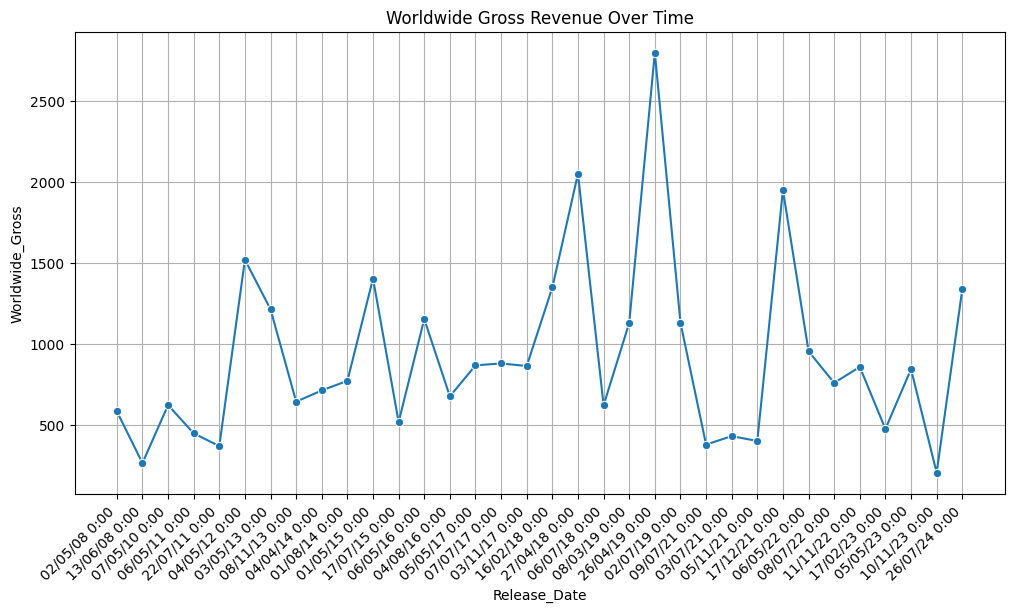

In [ ]:
# Set the figure size for better clarity
plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(data=df, x="Release_Date", y ="Worldwide_Gross", marker='o')

# Set a plot title
plt.title("Worldwide Gross Revenue Over Time", fontsize=12)

# Rotate x-axis labels to prevent overlap (for date labels)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add gridlines for easier reading of the plot
plt.grid(True)

# Show the plot
plt.show()


**3.3 Ratings Comparison:**

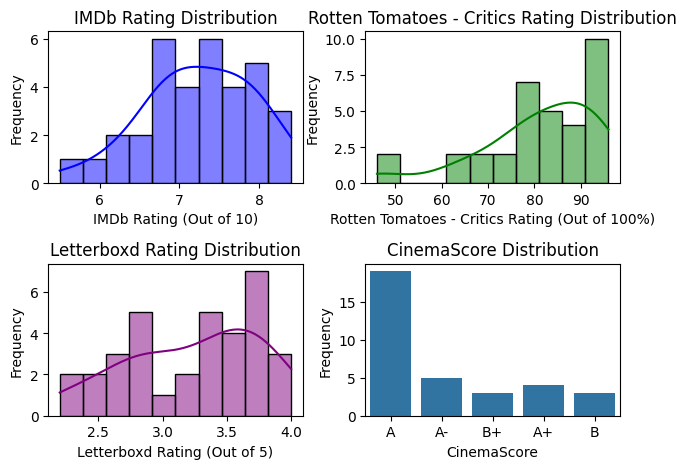

In [ ]:
# Create subplots for different platforms
# IMDb rating distribution (out of 10)
plt.subplot(2, 2, 1)
sns.histplot(df['IMDb'], kde=True, color='blue', bins=10)
plt.title('IMDb Rating Distribution')
plt.xlabel('IMDb Rating (Out of 10)')
plt.ylabel('Frequency')

# Rotten Tomatoes - Critics rating distribution (out of 100%)
plt.subplot(2, 2, 2)
sns.histplot(df['Rotten_Tomatoes_Critics'], kde=True, color='green', bins=10)
plt.title('Rotten Tomatoes - Critics Rating Distribution')
plt.xlabel('Rotten Tomatoes - Critics Rating (Out of 100%)')
plt.ylabel('Frequency')

# Letterboxd rating distribution (out of 5)
plt.subplot(2, 2, 3)
sns.histplot(df['Letterboxd'], kde=True, color='purple', bins=10)
plt.title('Letterboxd Rating Distribution')
plt.xlabel('Letterboxd Rating (Out of 5)')
plt.ylabel('Frequency')

# CinemaScore distribution (A+ to F grades)
plt.subplot(2, 2, 4)
sns.countplot(x='CinemaScore', data=df)
plt.title('CinemaScore Distribution')
plt.xlabel('CinemaScore')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


**3.4 Profitability Analysis**

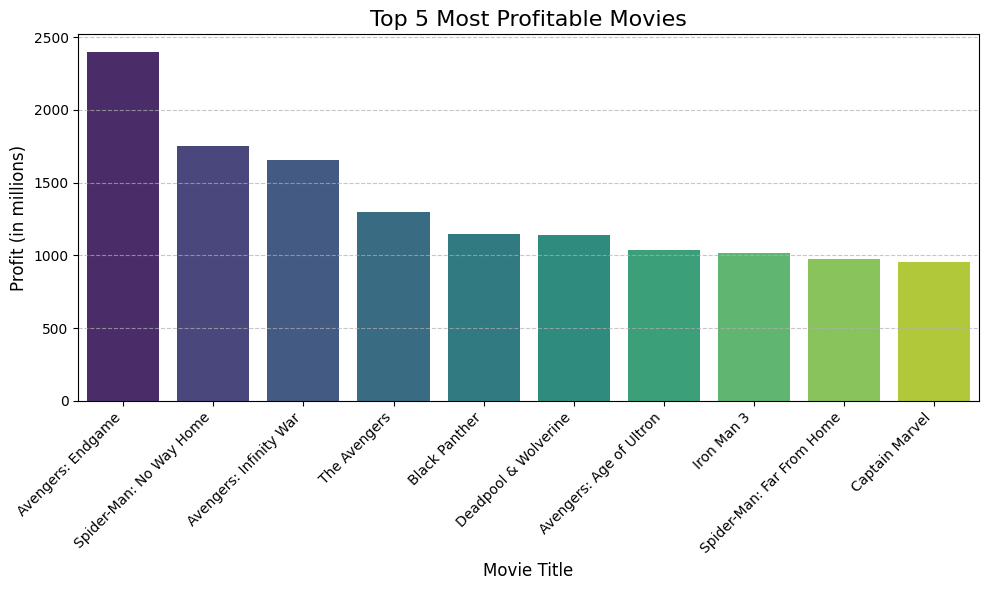

In [ ]:
# Create the bar plot for the top 5 profitable movies
top_profitable = df.nlargest(10, 'Profit')
plt.figure(figsize=(10, 6))

# Plot the bar plot
sns.barplot(data=top_profitable, x="Title", y="Profit", hue="Title", palette="viridis", legend=False)

# Add title and labels with enhanced font size
plt.title("Top 5 Most Profitable Movies", fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Profit (in millions)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



# Phase 4 : Export Data for Power BI Dashboard

In [ ]:
df.to_csv("/content/Marvel_Cleaned.csv", index=False)


# Phase 5 : Create Power BI Dashboard